In [1]:
import gym

env = gym.make("MountainCar-v0")
state = env.reset()

done = False
while not done:
    action = 2
    new_state, reward, done, _ = env.step(action)
    
    
print(reward, new_state) ## state 有 2個值  (位置,速度)
   

-1.0 [-0.35223877 -0.00319801]


In [2]:
print(env.observation_space.high)
print(env.observation_space.low)

[0.6  0.07]
[-1.2  -0.07]


In [3]:
## 連續 state 轉換成離散 state 

DISCRETE_OS_SIZE = [20, 20]  #離散成 30 等分


discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE


print(discrete_os_win_size)

[0.09  0.007]


In [4]:
import numpy as np

## initialized q table

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

print(q_table.shape)
print(q_table[:1])

(20, 20, 3)
[[[-0.98631512 -0.30928396 -1.04136988]
  [-1.91150936 -1.74890892 -0.47749101]
  [-1.79520609 -1.37242725 -1.51750587]
  [-1.83505459 -1.9439724  -1.63032487]
  [-0.86295431 -1.99802668 -0.82384786]
  [-1.1668931  -0.67122709 -0.88374876]
  [-0.5680852  -0.37005711 -1.86420303]
  [-1.91647709 -0.12007941 -0.97588747]
  [-1.53283425 -1.68690266 -1.39288622]
  [-0.31113817 -0.52382358 -0.29291533]
  [-0.19319085 -0.92784354 -1.8605258 ]
  [-1.96639086 -1.37508825 -0.05266023]
  [-0.61287906 -1.38247942 -1.11032473]
  [-1.3019037  -0.6258269  -0.68036415]
  [-0.68167363 -1.5566019  -1.08160631]
  [-0.0921345  -0.0153747  -1.19416969]
  [-0.58779862 -0.44181731 -0.21683413]
  [-0.4556002  -0.81432434 -0.86250249]
  [-0.36680202 -1.42445285 -1.880138  ]
  [-0.71750326 -0.26261348 -1.43589144]]]


完成第 0 次遊戲
Episode:     0, average reward: -200.0, current epsilon: 1.00
Episode:   100, average reward: -200.0, current epsilon: 0.87
Episode:   200, average reward: -200.0, current epsilon: 0.73
完成第 300 次遊戲
Episode:   300, average reward: -200.0, current epsilon: 0.60
Episode:   400, average reward: -200.0, current epsilon: 0.47
Episode:   500, average reward: -200.0, current epsilon: 0.33
完成第 600 次遊戲
Episode:   600, average reward: -200.0, current epsilon: 0.20
我們在第 692 次遊戲成功
我們在第 696 次遊戲成功
Episode:   700, average reward: -199.5, current epsilon: 0.07
我們在第 701 次遊戲成功
我們在第 772 次遊戲成功
我們在第 785 次遊戲成功
我們在第 790 次遊戲成功
我們在第 798 次遊戲成功
Episode:   800, average reward: -199.0, current epsilon: -0.00
我們在第 804 次遊戲成功
我們在第 808 次遊戲成功
我們在第 812 次遊戲成功
我們在第 817 次遊戲成功
我們在第 838 次遊戲成功
我們在第 841 次遊戲成功
我們在第 850 次遊戲成功
我們在第 851 次遊戲成功
我們在第 854 次遊戲成功
我們在第 857 次遊戲成功
完成第 900 次遊戲
Episode:   900, average reward: -196.9, current epsilon: -0.00
我們在第 912 次遊戲成功
我們在第 913 次遊戲成功
我們在第 915 次遊戲成功
我們在第 921 次遊戲成功
我們在第 922 次遊戲成功
我們

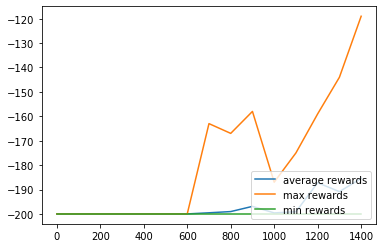

In [6]:
import gym
import numpy
import matplotlib.pyplot as plt
env = gym.make("MountainCar-v0")


DECAY_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 1500
SHOW_EVERY = 300
STATS_EVERY = 100


DISCRETE_OS_SIZE = [20]*len(env.observation_space.high)  #離散成 20 等分


discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE



# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

## initialized q table

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))



# 統計數據
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}




def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    # 取整數
    return tuple(discrete_state.astype(np.int))


# 遊戲執行次數
for episode in range(EPISODES):
    
    episode_reward = 0
 
    if episode % SHOW_EVERY == 0:
        print('完成第',episode,'次遊戲')
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)
            
        new_state, reward, done, _ = env.step(action)
        
        episode_reward += reward
        
        new_discrete_state = get_discrete_state(new_state)
        
        ### render 是 true時 才會有遊戲畫面
        if render:
            env.render()
            
        if not done:

            #q-learning 更新需要用到的值
            
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state][action]

            #q-learning 更新公式

            new_q = (1-DECAY_RATE) * current_q + DECAY_RATE*(reward + DISCOUNT * max_future_q)

            q_table[discrete_state][action] = new_q

             #車子位置
        elif new_state[0] >= env.goal_position:

            print('我們在第',episode,'次遊戲成功')
            q_table[discrete_state][action] = 0

        discrete_state = new_discrete_state
        # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    ep_rewards.append(episode_reward)
    
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/len(ep_rewards[-STATS_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')


env.close()


plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()